# Estimer la tendance centrale sur le cas de la poutre en flexion


## Flèche d'une poutre encastrée

Nous considérons une poutre encastrée définie par son module de Young $E$, sa longueur $L$ et son moment d'inertie $I$. Une extrémité est encastrée dans un mur et nous appliquons une charge $F$ à l'autre extrémité de la poutre, ce qui entraîne une déviation verticale $Y$, également nommée « flèche » en mécanique.

Nous nous intéressons à la déviation verticale d'un plongeoir provoquée par un enfant. Nous considérons un enfant dont le poids génère une force approximativement égale à 300 N (c'est-à-dire environ 30 kg). En raison des incertitudes sur le poids de la personne, nous considérons que la force est une variable aléatoire. La longueur du plongeoir est comprise entre 2,5 m et 2,6 m. Le module de Young est incertain et compris entre 65 et 75 GPa (c'est-à-dire entre $65 \times 10^9$ et $75 \times 10^9$ Pascals), ce qui correspond à de la fibre de verre, un matériau souvent utilisé pour les plongeoirs. Les incertitudes liées à la production du matériau sont prises en compte dans le module de Young et le moment d'inertie du plongeoir.


<img src="poutre.png" width="200">

**Figure 1.** Déviation verticale $Y$ de la poutre encastrée de longueur $L$.

## Entrées

- $E$ : Module de Young (Pa),
- $F$ : Charge (N),
- $L$ : Longueur de la poutre (m),
- $I$ : Moment d'inertie ($m^4$).

| Variable | Distribution                                                                      |
| -------- | --------------------------------------------------------------------------------- |
| E        | Beta(alpha = 0.9, beta = 3.5, a = $65 \times 10^9$, $b = 75 \times 10^9$)         |
| F        | Lognormal($\mu_F=300 $, $\sigma_F=30$, shift=0)                                   |
| L        | Uniform(min=2.5, max= 2.6)                                                        |
| I        | Beta(alpha = 2.5, beta = 4.0, a = $1.3 \times 10^{-7}$, b = $1.7 \times 10^{-7}$) |

**Tableau 1.** Lois marginales des variables $E$, $F$, $L$ et $I$.

Dans le tableau précédent, $\mu_F = \mathbb{E}[F]$ et $\sigma_F = \sqrt{\operatorname{Var}(F)}$ désignent la moyenne et l'écart-type de $F$. Les variables d'entrée sont supposées indépendantes.

**Remarque.** La variable $F$ est de loi Log-Normale. Il serait possible de paramétrer cette variable aléatoire en spécifiant la moyenne et l'écart-type de la variable gaussienne sous-jacente. Ce n'est toutefois pas ce qui est réalisé ici : nous spécifions la moyenne et l'écart-type de la variable $F$ elle-même. C'est la raison pour laquelle nous utiliserons par la suite la classe `LogNormalMuSigma`.

## Sortie

Le déplacement vertical à l'extrémité libre de la poutre encastrée est :
$$
Y  = \dfrac{F\, L^3}{3 \, E \, I}.
$$

## Quantité d'intérêt

Nous souhaitons estimer l'espérance $\mu_Y = \mathbb{E}[Y]$ et l'écart-type $\sqrt{\operatorname{Var}(Y)}$ de la sortie $Y$.



## Valeur de référence

Avec un échantillon Monte-Carlo de grande taille, nous obtenons une estimation de l'espérance de la sortie $Y$ :

$$
\overline{y} = 0.1707.
$$

L'intervalle de confiance à 95 % de l'espérance de $Y$ est :

$$
\mathbb{P}([0.1706, 0.1709] \ni \mu_Y) = 0.95.
$$


## Références

- Martelli, Alex, Anna Ravenscroft, and David Ascher. Python cookbook. O'Reilly Media, Inc., 2005.

## Intervalles statistiques

### Définitions

Les définitions suivantes introduisent les intervalles de confiance et de prédiction (voir (Meeker, Hahn, & Escobar, 2017) pages 25, 27 et 29 et (Blatman, et al., 2017)).

- **Intervalle de confiance :** C'est un intervalle calculé à partir des données, obtenu par une procédure qui, avec un niveau de confiance $1-\alpha$, produit un intervalle contenant le paramètre inconnu. Des exemples courants sont la moyenne $\mu$, l'écart-type $\sigma$, ou le quantile $x_p$.

- **Intervalle de dispersion (empirique) :** C'est un intervalle construit à partir des quantiles empiriques qui contient une fraction $p$ de la population, sans spécifier formellement de niveau de confiance. Il est souvent calculé simplement comme $[\widehat{x}_{(1-p)/2}, \widehat{x}_{(1+p)/2}]$ où $\widehat{x}_p$ est le quantile empirique de niveau $p$.

- **Intervalle de prédiction :** C'est un intervalle construit à partir des données tel qu’une future observation issue de la même population appartienne à cet intervalle avec une probabilité (niveau de confiance) donnée.

- **Intervalle de tolérance :** C'est un intervalle construit à partir des données qui contient, avec un niveau de confiance donné, au moins une proportion $p$ de la population.

### Application au modèle

Dans la suite, nous allons calculer les intervalles suivants.

- **Intervalle de confiance de la moyenne.** L'intervalle de confiance de niveau $p$ de la moyenne $\mu_Y = \mathbb{E}[Y]$ est tel que $\mathbb{P}([A, B] \ni \mu_Y) = p$. En d'autres termes, la probabilité que l'intervalle $[A, B]$ contienne la vraie moyenne de $Y$ est égale à $p$.

- **L'intervalle de dispersion contenant une proportion $p$ de la population.**
Nous cherchons l'intervalle $[y_{2.5\%}, y_{97.5\%}]$ contenant 95 % des réalisations de la variable $Y$.
Comme nous ne connaissons pas la distribution exacte de $Y$, nous utilisons une méthode de Monte-Carlo pour estimer les quantiles empiriques sur un grand échantillon.

### Remarques terminologiques

- Dans l'industrie française, l'intervalle contenant une proportion donnée de la population est souvent appelé **intervalle de dispersion**. Cependant, ce terme n'apparaît pas dans (Meeker et al., 2017).

- Il ne faut pas confondre l'intervalle de dispersion avec un intervalle de prédiction. Un intervalle de prédiction est conceptuellement plus large car il intègre l'incertitude sur l'estimation des paramètres en plus de la variabilité intrinsèque, afin de garantir l'encadrement d'une future observation unique.

- Dans le cas particulier d'une variable gaussienne, on peut déterminer un intervalle de tolérance unilatéral ou bilatéral par une méthode associée à un paramètre $k$ (voir (Vessereau, 1972)). On observe que la terminologie utilisée par (Vessereau, 1972) est "intervalle statistique de dispersion" ce qui correspond à l'intervalle de tolérance désigné ainsi par (Meeker et al., 2017). Dans le contexte d'OpenTURNS, la méthode [DistFunc.kFactor.html](https://openturns.github.io/openturns/latest/user_manual/_generated/openturns.DistFunc.kFactor.html) implémente le standard NF ISO 16269-6, qui est une extension de la méthode de (Vessereau, 1972).

## Références

- Meeker, W. Q., Hahn, G. J., & Escobar, L. A. (2017). _Statistical intervals: a guide for practitioners._ Second Edition. (Vol. 92). John Wiley & Sons.
- Blatman G., Delage T., Iooss B., Pérot N. (2017) Probabilistic risk bounds for the characterization of radiological contamination. Eur J Phys Nucl Sci Technol 3:23
- Vessereau, A. (1972). Note sur les intervalles statistiques de dispersion. _Revue de statistique appliquée_, _20_(1), 67-87.




## Définition du modèle

In [1]:
import openturns as ot
import openturns.viewer as otv
import math
import tabulate

On fixe la graine pour garantir la reproductibilité des résultats


In [2]:
ot.RandomGenerator.SetSeed(0)

On commence par définir les lois marginales.

In [3]:
dist_E = ot.Beta(0.9, 3.5, 65.0e9, 75.0e9)
dist_E.setDescription(["E"])
F_para = ot.LogNormalMuSigma(300.0, 30.0, 0.0)  # Paramétrage par les moments
dist_F = ot.ParametrizedDistribution(F_para)
dist_F.setDescription(["F"])
dist_L = ot.Uniform(2.50, 2.60)  # in m
dist_L.setDescription(["L"])
dist_I = ot.Beta(2.5, 4.0, 1.3e-7, 1.7e-7)  # in m^4
dist_I.setDescription(["I"])

Les variables sont indépendantes, de telle sorte que l'on n'a pas besoin de spécifier une copule.

In [4]:
distributionCollection = [dist_E, dist_F, dist_L, dist_I]
X = ot.JointDistribution(distributionCollection)

Puis on définit le modèle.

In [5]:
g = ot.SymbolicFunction(["E", "F", "L", "I"], ["F * L^3 /  (3 * E * I)"])
g.setOutputDescription(["Y (m)"])

**Remarque.** Pour un gain de performance lors de simulations massives, l'utilisation d'une `PythonFunction` vectorisée avec NumPy peut être envisagé. La différence de performance entre `ot.PythonFunction` et `ot.SymbolicFunction` dépend de la fonction, de son implémentation, de taille de l'échantillon et de la machine.

Pour pouvoir exploiter au mieux les simulations, nous équipons la fonction d'un mécanisme d'historique avec la classe `MemoizeFunction`. Il s'agit d'un système de mémoire cache qui permet à la fonction `g` d'améliorer la performance. Lorsque la fonction est appelée une première fois avec un point $x$ en entrée alors la fonction évalue la sortie `y = g(x)`, puis enregistre le couple `(x,y)` en mémoire. Si la fonction `g` est évaluée une seconde fois avec le même point `x`, alors la valeur `y` correspondante est retournée sans nécessairement évaluer la fonction `g`. Plus de détails sur ce type de mécanisme sont présentés dans (Martelli, 2005) page 656. De plus, la classe permet de fournir l'historique des points d'entrée et de sortie que la fonction a évalué. C'est cette dernière fonctionnalité que nous utilisons dans ce script (et pas le mécanisme de mémoire cache). Toutefois, il faut noter que le mécanisme de cache et d'historique sont activés par défaut. Ainsi, il peut arriver que la mémoire utilisée soit importante. Si besoin, on peut désactiver l'une ou l'autre option, si elle n'est pas utilisée.

In [6]:
g = ot.MemoizeFunction(g)

Enfin, nous définissons le vecteur aléatoire de sortie.

In [7]:
XRV = ot.RandomVector(X)
Y = ot.CompositeRandomVector(g, XRV)
Y.setDescription(["Y (m)"])

## Par développement de Taylor

La classe `TaylorExpansionMoments` permet de réaliser le développement de Taylor. 

**Remarque.** Puisque le modèle physique $g$ est une `SymbolicFunction`, son gradient peut être évalué de manière exacte. C'est utile pour le développement de Taylor, puisque le gradient est impliqué dans certains calculs (par exemple, dans le calcul de la moyenne à l'ordre 2, mais aussi dans le calcul de la variance). Cela ne serait pas nécessairement le cas si la fonction était implémentée sous la forme d'une `PythonFunction`. En effet, par défaut, une telle fonction est associée à un gradient approché par une formule de différences finies. Dans ce cas, les erreurs d'approximation du gradient pourraient avoir un impact sur les estimations produites.

In [8]:
taylor = ot.TaylorExpansionMoments(Y)

La moyenne $\mathbb{E}[Y]$ peut être estimée à l'ordre 1 avec `getMeanFirstOrder` ou bien à l'ordre 2 (c'est-à-dire en tenant compte des dérivées secondes) avec `getMeanSecondOrder`.

In [9]:
taylorMeanFirstOrder = taylor.getMeanFirstOrder()[0]
taylorMeanFirstOrder

0.1701111380145278

In [10]:
taylorMeanSecondOrder = taylor.getMeanSecondOrder()[0]
taylorMeanSecondOrder

0.1706969419399231

La variance peut être calculée à l'ordre 1 uniquement.

In [11]:
taylor.getCovariance()[0, 0]

0.0004112803852960523

L'écart-type de la sortie peut être calculé en évaluant la racine carrée.

In [12]:
taylorSDFirstOrder = math.sqrt(taylor.getCovariance()[0, 0])
taylorSDFirstOrder

0.020280048947082262

La méthode `getGradientAtMean()` permet d'obtenir la valeur du gradient évaluée au point moyen. C'est un ingrédient important pour estimer les facteurs d'importance.

In [13]:
taylor.getGradientAtMean()

class=Matrix implementation=class=MatrixImplementation name=Unnamed rows=4 columns=1 values=[-2.53725e-12,0.000567037,0.200131,-1.17008e+06]

Les facteurs d'importance $\eta_i$ peuvent être obtenus avec la méthode `getImportanceFactors` ou dessinés avec la méthode `drawImportanceFactors`.

In [14]:
importanceFactors = taylor.getImportanceFactors()
importanceFactors

class=PointWithDescription name=Unnamed dimension=4 description=[E,F,L,I] values=[0.0471628,0.703601,0.0811537,0.168082]

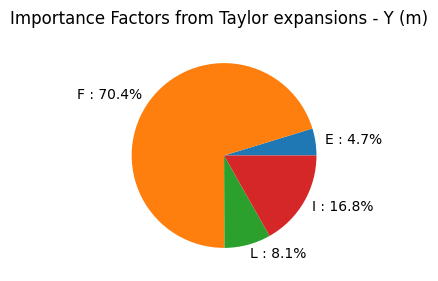

In [15]:
graph = taylor.drawImportanceFactors()
view = otv.View(graph, figure_kw={"figsize": (4.0, 3.0)})

On observe que la variabilité de la sortie $Y$ est principalement sensible à la variabilité de $F$ et, de manière moins importante par la variabilité de $I$. La variable $E$ pourrait être remplacée par une constante sans changer significativement la variance de la sortie.

Une mise en garde s'impose au sujet des facteurs d'importance obtenus par la méthode `getImportanceFactors()` : la dépendance éventuelle dans le vecteur aléatoire en entrée est ignorée. 

## Par Monte-Carlo simple avec un budget fixé

La manière la plus simple de faire une étude consiste à fixer le nombre de simulations à l'avance. En d'autres termes, on fixe $n$ et on génère un échantillon de la variable de sortie $Y$ de taille $n$. C'est la méthode « classique ».

In [16]:
sampleSizeMonteCarloSimple = 10000
Ysample = Y.getSample(sampleSizeMonteCarloSimple)

La manière la plus simple d'observer la variabilité de la sortie consiste à tracer l'histogramme empirique.

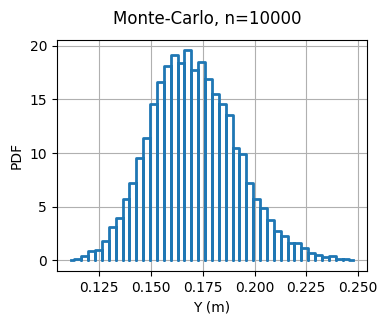

In [17]:
graph = ot.HistogramFactory().build(Ysample).drawPDF()
graph.setTitle(f"Monte-Carlo, n={sampleSizeMonteCarloSimple}")
graph.setXTitle("Y (m)")
graph.setLegends([""])  # Suppression de la légende inutile
view = otv.View(graph, figure_kw={"figsize": (4.0, 3.0)})

Les méthodes associées à l'échantillon permettent d'estimer la moyenne, la variance et l'écart-type.

In [18]:
sampleMeanSimpleMC = Ysample.computeMean()[0]
sampleMeanSimpleMC

0.17052409816264258

In [19]:
Ysample.computeVariance()[0]

0.0004227222866206568

In [20]:
sampleSDSimpleMC = Ysample.computeStandardDeviation()[0]
sampleSDSimpleMC

0.020560211249417083

In [21]:
probability = 0.95
lower_bound = (1 - probability) / 2.0
upper_bound = 1.0 - lower_bound

y_quantile_025p = Ysample.computeQuantilePerComponent(lower_bound)[0]
print(f"Quantile au niveau {lower_bound:.4f} = {y_quantile_025p:.4f}")

y_quantile_975p = Ysample.computeQuantilePerComponent(upper_bound)[0]
print(f"Quantile au niveau {upper_bound:.4f} = {y_quantile_975p:.4f}")

predictionIntervalSimpleMC = (y_quantile_025p, y_quantile_975p)
print("Intervalle de dispersion approché :")
print(
    f"  L'intervalle [{predictionIntervalSimpleMC[0]:.4f}, {predictionIntervalSimpleMC[1]:.4f}] "
    f"contient approximativement "
)
print(f"  {100.0 * probability:.2f} % de la population Y.")

Quantile au niveau 0.0250 = 0.1333
Quantile au niveau 0.9750 = 0.2140
Intervalle de dispersion approché :
  L'intervalle [0.1333, 0.2140] contient approximativement 
  95.00 % de la population Y.


## Par Monte-Carlo simple avec un algorithme itératif

La méthode la plus performante consiste à utiliser la plus petite taille de l'échantillon possible assurant une précision déterminée. Pour cela, le plan d'expériences augmente de manière incrémentale, en mettant à jour la moyenne empirique. Pour améliorer la performance, les simulations sont réalisées avec une taille de sous-échantillon, ou « bloc », fixée par l'utilisateur. Lorsqu'on souhaite estimer la moyenne, c'est la méthode « moderne ».

Une méthode possible consiste à utiliser deux boucles imbriquées fondée sur une boucle externe de taille `maximumOuterSampling` et une boucle interne de taille `blockSize`. L'implémentation suivante empêcherait toute parallélisation car les évaluations de la fonction `g` sont réalisées une par une :
```python
for i in range(maximumOuterSampling):
    for j in range(blockSize):
        sample = Y.getSample(1)
```
L'implémentation suivante, utilisée par `ot.ExpectationSimulationAlgorithm`,  permet la parallélisation car on peut évaluer plusieurs points à la fois à l'intérieur d'un bloc :
```python
for i in range(maximumOuterSampling):
    sample = Y.getSample(blockSize)
```
En effet, la méthode `getSample()` est parallèle si la fonction `g` est elle-même parallèle. 

L'espérance est estimée par la moyenne empirique :

$$
\overline{y} = \frac{1}{n} \sum_{i = 1}^n y^{(i)}
$$

où $y^{(i)}$ est la $i$-ème observation de la sortie.
La loi de la moyenne empirique de la sortie $Y=g(\boldsymbol{X})$ est asymptotiquement gaussienne :

$$
\overline{Y} \xrightarrow{d} \mathcal{N}\left(\mu, \frac{\sigma^2}{n}\right)
$$

quand $n\rightarrow \infty$, où $\mu = \mathbb{E}[Y]$ et $\sigma^2 = \operatorname{Var}(Y)$.
Par conséquent, le coefficient de variation asymptotique de l'estimateur $\overline{Y_n}$ est :

$$
\operatorname{CV}\left(\overline{Y}\right) = \frac{\sqrt{\operatorname{Var}\left(\overline{Y}\right)}}{\left|\mathbb{E}\left[\overline{Y}\right]\right|} = \frac{\sigma/\sqrt{n}}{|\mu|}
$$

si $\mu \neq 0$.
On l'estime par :

$$
\widehat{\operatorname{CV}}\left(\overline{Y}\right) = \frac{\widehat{\sigma}/\sqrt{n}}{\left|\overline{y}_n\right|}.
$$

L'algorithme accroît la valeur de $n$ tant que :
$$
\widehat{\operatorname{CV}}\left(\overline{Y}\right) > \operatorname{CV}_{\max}
$$

où $\operatorname{CV}_{\max}$ est spécifié par l'utilisateur. Par exemple, on peut utiliser $\operatorname{CV}_{\max} = 0.1$ pour estimer l'espérance avec un coefficient de variation inférieur à 10%.

**Remarque.** Dans le contexte d'une simulation Monte-Carlo avec à un échantillon de grande taille, il serait pertinent d'implémenter le modèle physique avec la classe `PythonFunction`, associée à une vectorisation fondée sur Numpy et l'option `func_sample`. Toutefois, il n'est pas évident que le résultat soit plus avantageux que celui produit par la classe `SymbolicFunction`. Cela dépend de la taille de l'échantillon, du modèle physique $g$ et de la machine sur laquelle le modèle physique est évalué.

Dans le code suivant, nous utilisons la classe `ExpectationSimulationAlgorithm`. Le choix des paramètres résulte d'un **compromis** entre la **performance** (pilotée par la taille du bloc) et le **nombre d'évaluations du modèle physique** $g$ (pilotée par le nombre d'itérations externes). La taille du bloc peut être configurée en fonction du nombre de processeurs (par exemple 16), mais un nombre plus grand peut être utilisé en fonction du contexte. Par exemple, une taille de bloc égale à 100 ou 1000 permettra de solliciter davantage chaque processeur. Toutefois, si la taille du bloc est trop grande, il peut arriver que le nombre d'évaluations de $g$ réellement utilisées par l'algorithme pour satisfaire au critère d'arrêt soit beaucoup plus grand que nécessaire. C'est la raison pour laquelle la taille du bloc ne doit être ni trop grande, sinon la fonction $g$ peut être évaluée un nombre de fois plus important que nécessaire, ni trop petite, sinon le niveau de parallélisation est insuffisant pour obtenir un résultat de manière performante.

In [22]:
g.clearHistory()

algo = ot.ExpectationSimulationAlgorithm(Y)
algo.setMaximumOuterSampling(1000)
algo.setBlockSize(32)  # Proportionnellement au nombre de processeurs
algo.setMaximumCoefficientOfVariation(0.01)

algo.run()

result = algo.getResult()

outerSampleSize = result.getOuterSampling()
print(f"Nombre d'itérations = {outerSampleSize}")
sampleMeanIterativeMC = result.getExpectationEstimate()[0]
print(f"Moyenne = {sampleMeanIterativeMC:f}")

blocksize = result.getBlockSize()
sampleSizeIterativeMC = outerSampleSize * blocksize
print(f"Nombre d'évaluations de g = {sampleSizeIterativeMC}")

cv = result.getCoefficientOfVariation()[0]
print(f"Coef. de variation = {cv:.6f}")

Nombre d'itérations = 6
Moyenne = 0.168222
Nombre d'évaluations de g = 192
Coef. de variation = 0.009190


L'estimation de la moyenne suit une distribution gaussienne asymptotique connue, qui peut être récupérée avec la méthode `getExpectationDistribution()`.

Normal(mu = 0.168222, sigma = 0.00154594)


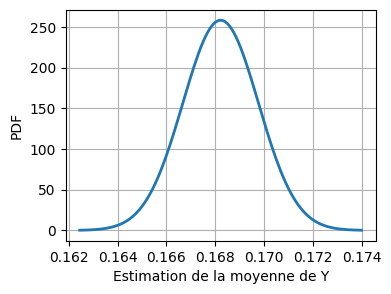

In [23]:
sample_mean_distribution = result.getExpectationDistribution()
sample_mean_distribution.setDescription(["Estimation de la moyenne de Y"])
print(sample_mean_distribution)
graph = sample_mean_distribution.drawPDF()
graph.setLegends([""])  # Suppression de la légende inutile
view = otv.View(graph, figure_kw={"figsize": (4.0, 3.0)})

In [24]:
confidenceLevel = 0.95
sampleMeanCIIterativeMC = sample_mean_distribution.computeBilateralConfidenceInterval(
    confidenceLevel
)
lowerBound = sampleMeanCIIterativeMC.getLowerBound()[0]
upperBound = sampleMeanCIIterativeMC.getUpperBound()[0]
print("Intervalle de confiance de la moyenne :")
print(
    f"  La probabilité que l'intervalle "
    f"[{lowerBound:.4f}, {upperBound:.4f}] "
    f"contienne "
)
print(
    f"  la vraie moyenne de Y est égale à {100.0 * confidenceLevel:.2f} %."
)

Intervalle de confiance de la moyenne :
  La probabilité que l'intervalle [0.1652, 0.1713] contienne 
  la vraie moyenne de Y est égale à 95.00 %.


In [25]:
Ysample = g.getOutputHistory()
sampleSize = Ysample.getSize()
sampleVarianceIterativeMC = Ysample.computeVariance()[0]
print(f"Variance = {sampleVarianceIterativeMC:.4f}")

sampleSDIterativeMC = math.sqrt(sampleVarianceIterativeMC)
print(f"StDev = {sampleSDIterativeMC:.4f}")

Variance = 0.0005
StDev = 0.0215


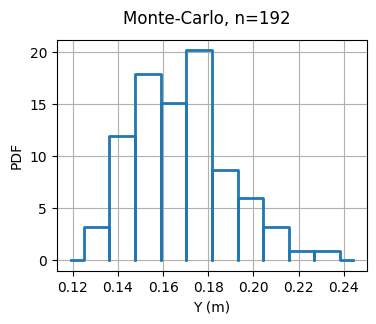

In [26]:
graph = ot.HistogramFactory().build(Ysample).drawPDF()
graph.setTitle(f"Monte-Carlo, n={sampleSize}")
graph.setXTitle("Y (m)")
graph.setLegends([""])  # Suppression de la légende inutile
view = otv.View(graph, figure_kw={"figsize": (4.0, 3.0)})

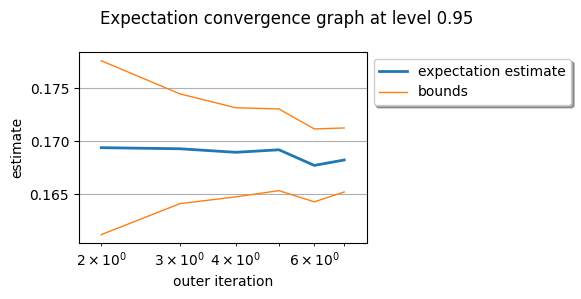

In [27]:
graph = algo.drawExpectationConvergence()
graph.setLogScale(ot.GraphImplementation.LOGX)
graph.setLegendPosition("upper left")
graph.setLegendCorner((1.0, 1.0))
view = otv.View(graph, figure_kw={"figsize": (6.0, 3.0)})

## Synthèse des résultats


In [28]:
print("Intervalle de prédiction approché :")
print(
    f"  L'intervalle contenant approximativement {100.0 * confidenceLevel:.2f} % "
)
print(
    f"  de la population Y est [{predictionIntervalSimpleMC[0]:.4f}, {predictionIntervalSimpleMC[1]:.4f}]."
)
print("Intervalle de confiance de la moyenne :")
print(
    f"  La probabilité que l'intervalle "
    f"[{lowerBound:.4f}, {upperBound:.4f}] "
)
print(
    f"  contienne la moyenne réelle est égale à {100.0 * confidenceLevel:.2f} %."
    )
# Table
data = []
data.append(["Taylor, 1er ordre", taylorMeanFirstOrder, taylorSDFirstOrder])
data.append(["Taylor, 2nd ordre", taylorMeanSecondOrder, math.nan])
data.append(
    [
        f"Monte-Carlo simple, n={sampleSizeMonteCarloSimple}",
        sampleMeanSimpleMC,
        sampleSDSimpleMC,
    ]
)
data.append(
    [
        f"Monte-Carlo itératif, n={sampleSizeIterativeMC}",
        sampleMeanIterativeMC,
        sampleSDIterativeMC,
    ]
)
tabulate.tabulate(
    data, headers=["Méthode", "Moyenne", "Ecart-type"], tablefmt="html", floatfmt=".4f"
)

Intervalle de prédiction approché :
  L'intervalle contenant approximativement 95.00 % 
  de la population Y est [0.1333, 0.2140].
Intervalle de confiance de la moyenne :
  La probabilité que l'intervalle [0.1652, 0.1713] 
  contienne la moyenne réelle est égale à 95.00 %.


Méthode,Moyenne,Ecart-type
"Taylor, 1er ordre",0.1701,0.0203
"Taylor, 2nd ordre",0.1707,nan
"Monte-Carlo simple, n=10000",0.1705,0.0206
"Monte-Carlo itératif, n=192",0.1682,0.0215


On observe qu'il n'y a pas beaucoup de différence pour l'estimation de la moyenne entre le développement de Taylor au premier et au second ordre. En effet, la moyenne passe de 0.1701 à 0.1707. Cela montre que le modèle n'est pas exactement localement linéaire, mais que la non-linéarité n'est pas très importante. En d'autres termes, la contribution de la dérivée seconde à l'estimation de la moyenne n'est pas très significative, sans être toutefois négligeable. 

On observe que seulement 110 simulations ont été nécessaires par la méthode de Monte-Carlo itérative pour obtenir un coefficient de variation inférieur au seuil. Cela montre qu'utiliser 10 000 simulations dans la simulation de Monte-Carlo simple n'était pas forcément nécessaire. 

On observe que les 4 estimations de la moyenne sont cohérentes. Cela montre que le comportement localement linéaire utilisé par le développement de Taylor est une approximation satisfaisante du comportement global du modèle $g$ sur son domaine d'entrée $\mathcal{X}$. Le modèle présente une faible non-linéarité, puisque la différence entre le développement de Taylor à l'ordre 1 et l'estimation Monte-Carlo n'est pas très importante. 

## Exercice 1 : vérifications du développement de Taylor

L'objectif de cet exercice est de vérifier que les méthodes de la librairie coïncident avec les formules que nous avons présentées précédemment pour l'estimation des moments par développement de Taylor.

**Questions.**

- Utiliser la méthode `getMean` de la variable `X` pour créer la variable `muX` contenant le point moyen $\mu$ du vecteur aléatoire en entrée.
- Evaluer le modèle `g` au point `muX` et comparer avec la valeur de retour de la méthode `getMeanFirstOrder`.
- Utiliser la méthode `gradient` de la fonction `g` pour créer la variable `gradient` contenant la valeur du gradient de la fonction $g$ au point `muX`. 
- Utiliser la méthode `getCovariance` de la variable `X` pour créer la variable `covX` contenant la matrice de covariance diagonale du vecteur aléatoire en entrée. 
- Avec une boucle `for`, calculer la variance de la sortie `Y` en utilisant le développement de Taylor à l'ordre 1.
Pour cela, vous pourrez vous aider du squelette suivant, dans lequel vous remplacerez les sections *TODO* par du code Python valide.
```python
dim = len(distcoll)
varianceY = 0.0
for i in range(dim):
    varianceY += TODO
```

- Comparer le résultat précédent avec la valeur de retour de la méthode `getCovariance()` de l'objet `taylor`.

## Exercice 2 : loi de la moyenne empirique

L'objectif de cet exercice est de vérifier la loi gaussienne de la moyenne empirique indiquée par le T.C.L.. Pour cela, nous considérons un échantillon Monte-Carlo simple de taille $n=100$. Cette faible taille d'échantillon est associée à une variabilité relativement importante de l'estimateur de la moyenne empirique. Puis nous allons réaliser $r$ estimations de la moyenne empirique. Nous allons ensuite comparer la distribution théorique et la distribution empirique.

**Questions.**

- Créer la variable `n=100`. 
- Générer un échantillon `Ysample` de taille `n` de la variable de sortie `Y`. Créer la variable `sigma` contenant l'écart-type empirique de cet échantillon. 
- Créer la variable `r=1000`. 
- Créer la variable `meanSample` de type `Sample` de taille `r` en dimension 1.
- Avec une boucle `for` sur l'indice `k`, répéter l'expérience suivante `r` fois. 
  - Générer un échantillon `Ysample` de taille `n` de la variable de sortie `Y`.
  - Stocker dans `meanSample[k,0]` la moyenne empirique de `Ysample`.
Pour cela, vous pourrez vous inspirer du squelette suivant, dans lequel vous remplacerez les sections *TODO* par du code Python valide.

```python
r = 1000
meanSample = ot.Sample(r,1)
for k in range(r):
    Ysample = TODO
    meanSample[k,0] = Ysample.TODO
```

- Calculer `mu` la moyenne empirique de l'échantillon `meanSample`. 
- Créer la variable `M` de loi gaussienne de moyenne `mu` et d'écart-type `sigma/sqrt(n)`. 
- Dessiner l'histogramme empirique de l'échantillon `meanSample`. Dans le même graphique, dessiner la PDF de `M`.
- Optionnel : Utiliser la taille d'échantillon `n=400`. Quel est l'impact sur la distribution de la moyenne empirique ?

## Exercice 3 : fixer une variable

On observe que le facteur d'importance associé à la variable $L$ est égal à 0.08115. Cela implique que, si on fixe cette variable à sa valeur moyenne, alors la variance va être peu modifiée. L'objectif de cet exercice est de le vérifier expérimentalement.

**Questions.**

- Créer la variable `Lmean` contenant la valeur moyenne de la variable `dist_L` associée à $L$ grâce à la méthode `getMean`. 
- Créer la variable `L_fixed` contenant une distribution de type `Dirac` de paramètre `Lmean`. 
- Créer la distribution `Xfixed` associée au vecteur aléatoire dont la marginale $L$ est fixée. 
- Créer la variable `Yfixed` contenant le vecteur aléatoire de sortie associé. 
- Calculer la moyenne et la variance prédites par le développement de Taylor à l'ordre 1. 
- Comparer ces résultats avec les résultats du modèle précédent. 
- La perte de variance correspond-elle à la valeur du facteur d'importance ? Pourquoi ?

## Exercice 4 : développement de Taylor avec dépendance

On suppose que le problème est associé à une structure de dépendance gaussienne. Le coefficient de corrélation de Spearman (sur les rangs) est entre la longueur $L$ et le moment d'inertie $I$ est égal à 
$$
\rho_{rg}(L,I) = -0.2.
$$
L'objectif de cet exercice est d'observer comment cette dépendance peut affecter les moments estimés par développement de Taylor.

**Questions.**

- Définir la copule associée à cette nouvelle structure de dépendance. Pour cela, créer la matrice de corrélation de Spearman sur les rangs `matrice_correlation_Spearman` avec la classe `CorrelationMatrix`. 
- Créer la variable `matrice_correlation_Pearson` contenant la matrice de corrélation de Pearson calculée grâce à la fonction `GetCorrelationFromSpearmanCorrelation` et de la matrice `matrice_correlation_Spearman`.
- Créer la variable `copula` contenant la copule gaussienne grâce à la classe `NormalCopula`.
- Créer la variable `Xgauss` contenant le vecteur aléatoire en entrée du modèle, puis le vecteur aléatoire de sortie correspondant `Ygauss`.
- Utiliser la classe `TaylorExpansionMoments` pour calculer la moyenne, l'écart-type et les facteurs d'importance de la sortie `Y`.
- Comparer les résultats numériques avec ceux sans dépendance. Comment expliquer les différences ?